# <font color='green'>House Price Predictions</font> 
* **Part 1 - Data Preprocessing**
   1. Importing libraries
   2. Importing the dataset
   3. Dataset information
   4. Dropping unnecessary columns
      - "Train" 
      - "Test" 
   5. Taking care of misssing data
      - "Train" Numerical
      - "Train" Categorical
      - "Test" Numerical
      - "Test" Categorical
      - Updated info()
   6. Encoding categorical data
      - "Train"
      - "Test"
      - Updated head()
   7. Spliting the Train & Test datasets
   8. Feature Scaling  
   9. Dimensionality reduction
* **Part 2 - Training the Regression model**
   1. RandomForest 
   2. Other algorithms
   3. Accuracy score  
* **Part 3 - Creating a submission.csv**

# <font color='blue'>Part 1 - Data Preprocessing</font>

# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import figure

# Importing the dataset

In [2]:
train_df = pd.read_csv('../input/home-data-for-ml-course/train.csv')
test_df = pd.read_csv('../input/home-data-for-ml-course/test.csv')

# Dataset information

In [3]:
# data type and missing values of each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
# Description of both datasets
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
# 1st 5 rows of every column for overview
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

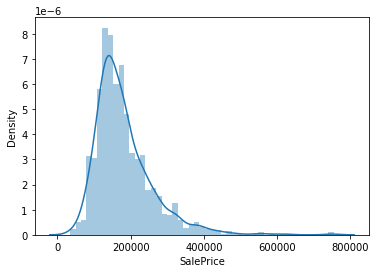

In [9]:
sns.distplot(train_df['SalePrice'])

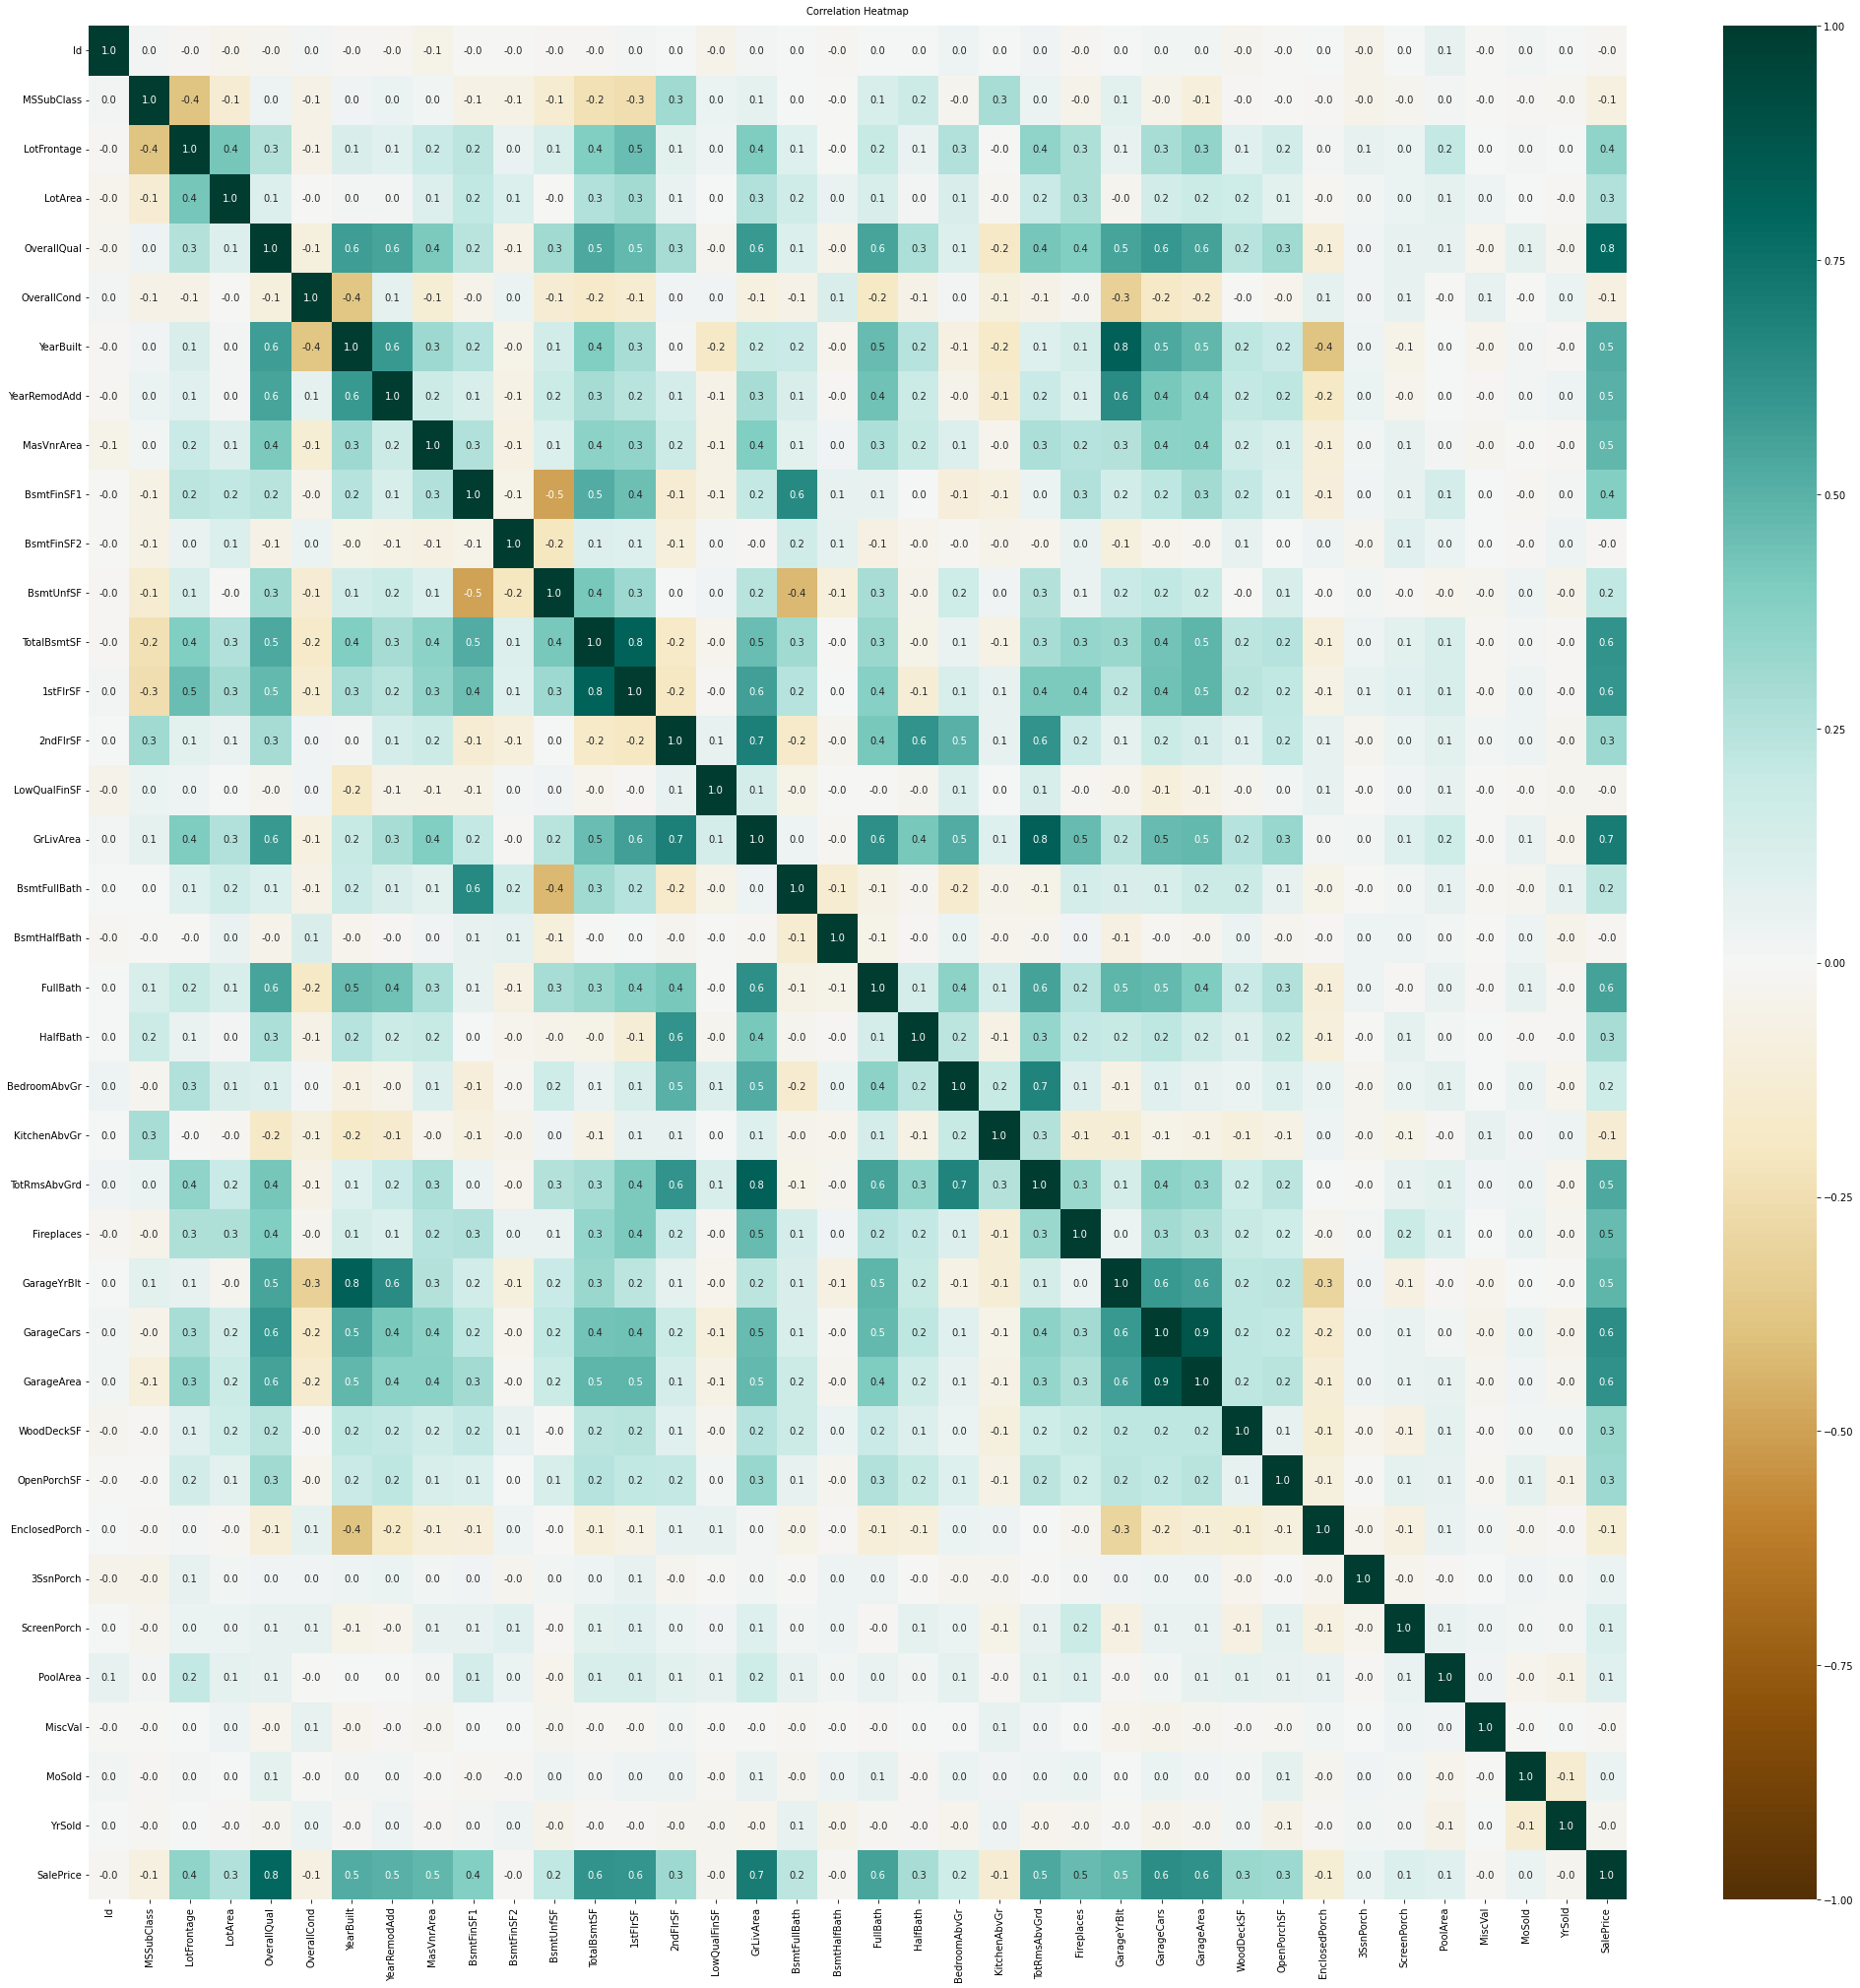

In [10]:
plt.rcParams['figure.figsize']=35,35
g = heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',fmt = ".1f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

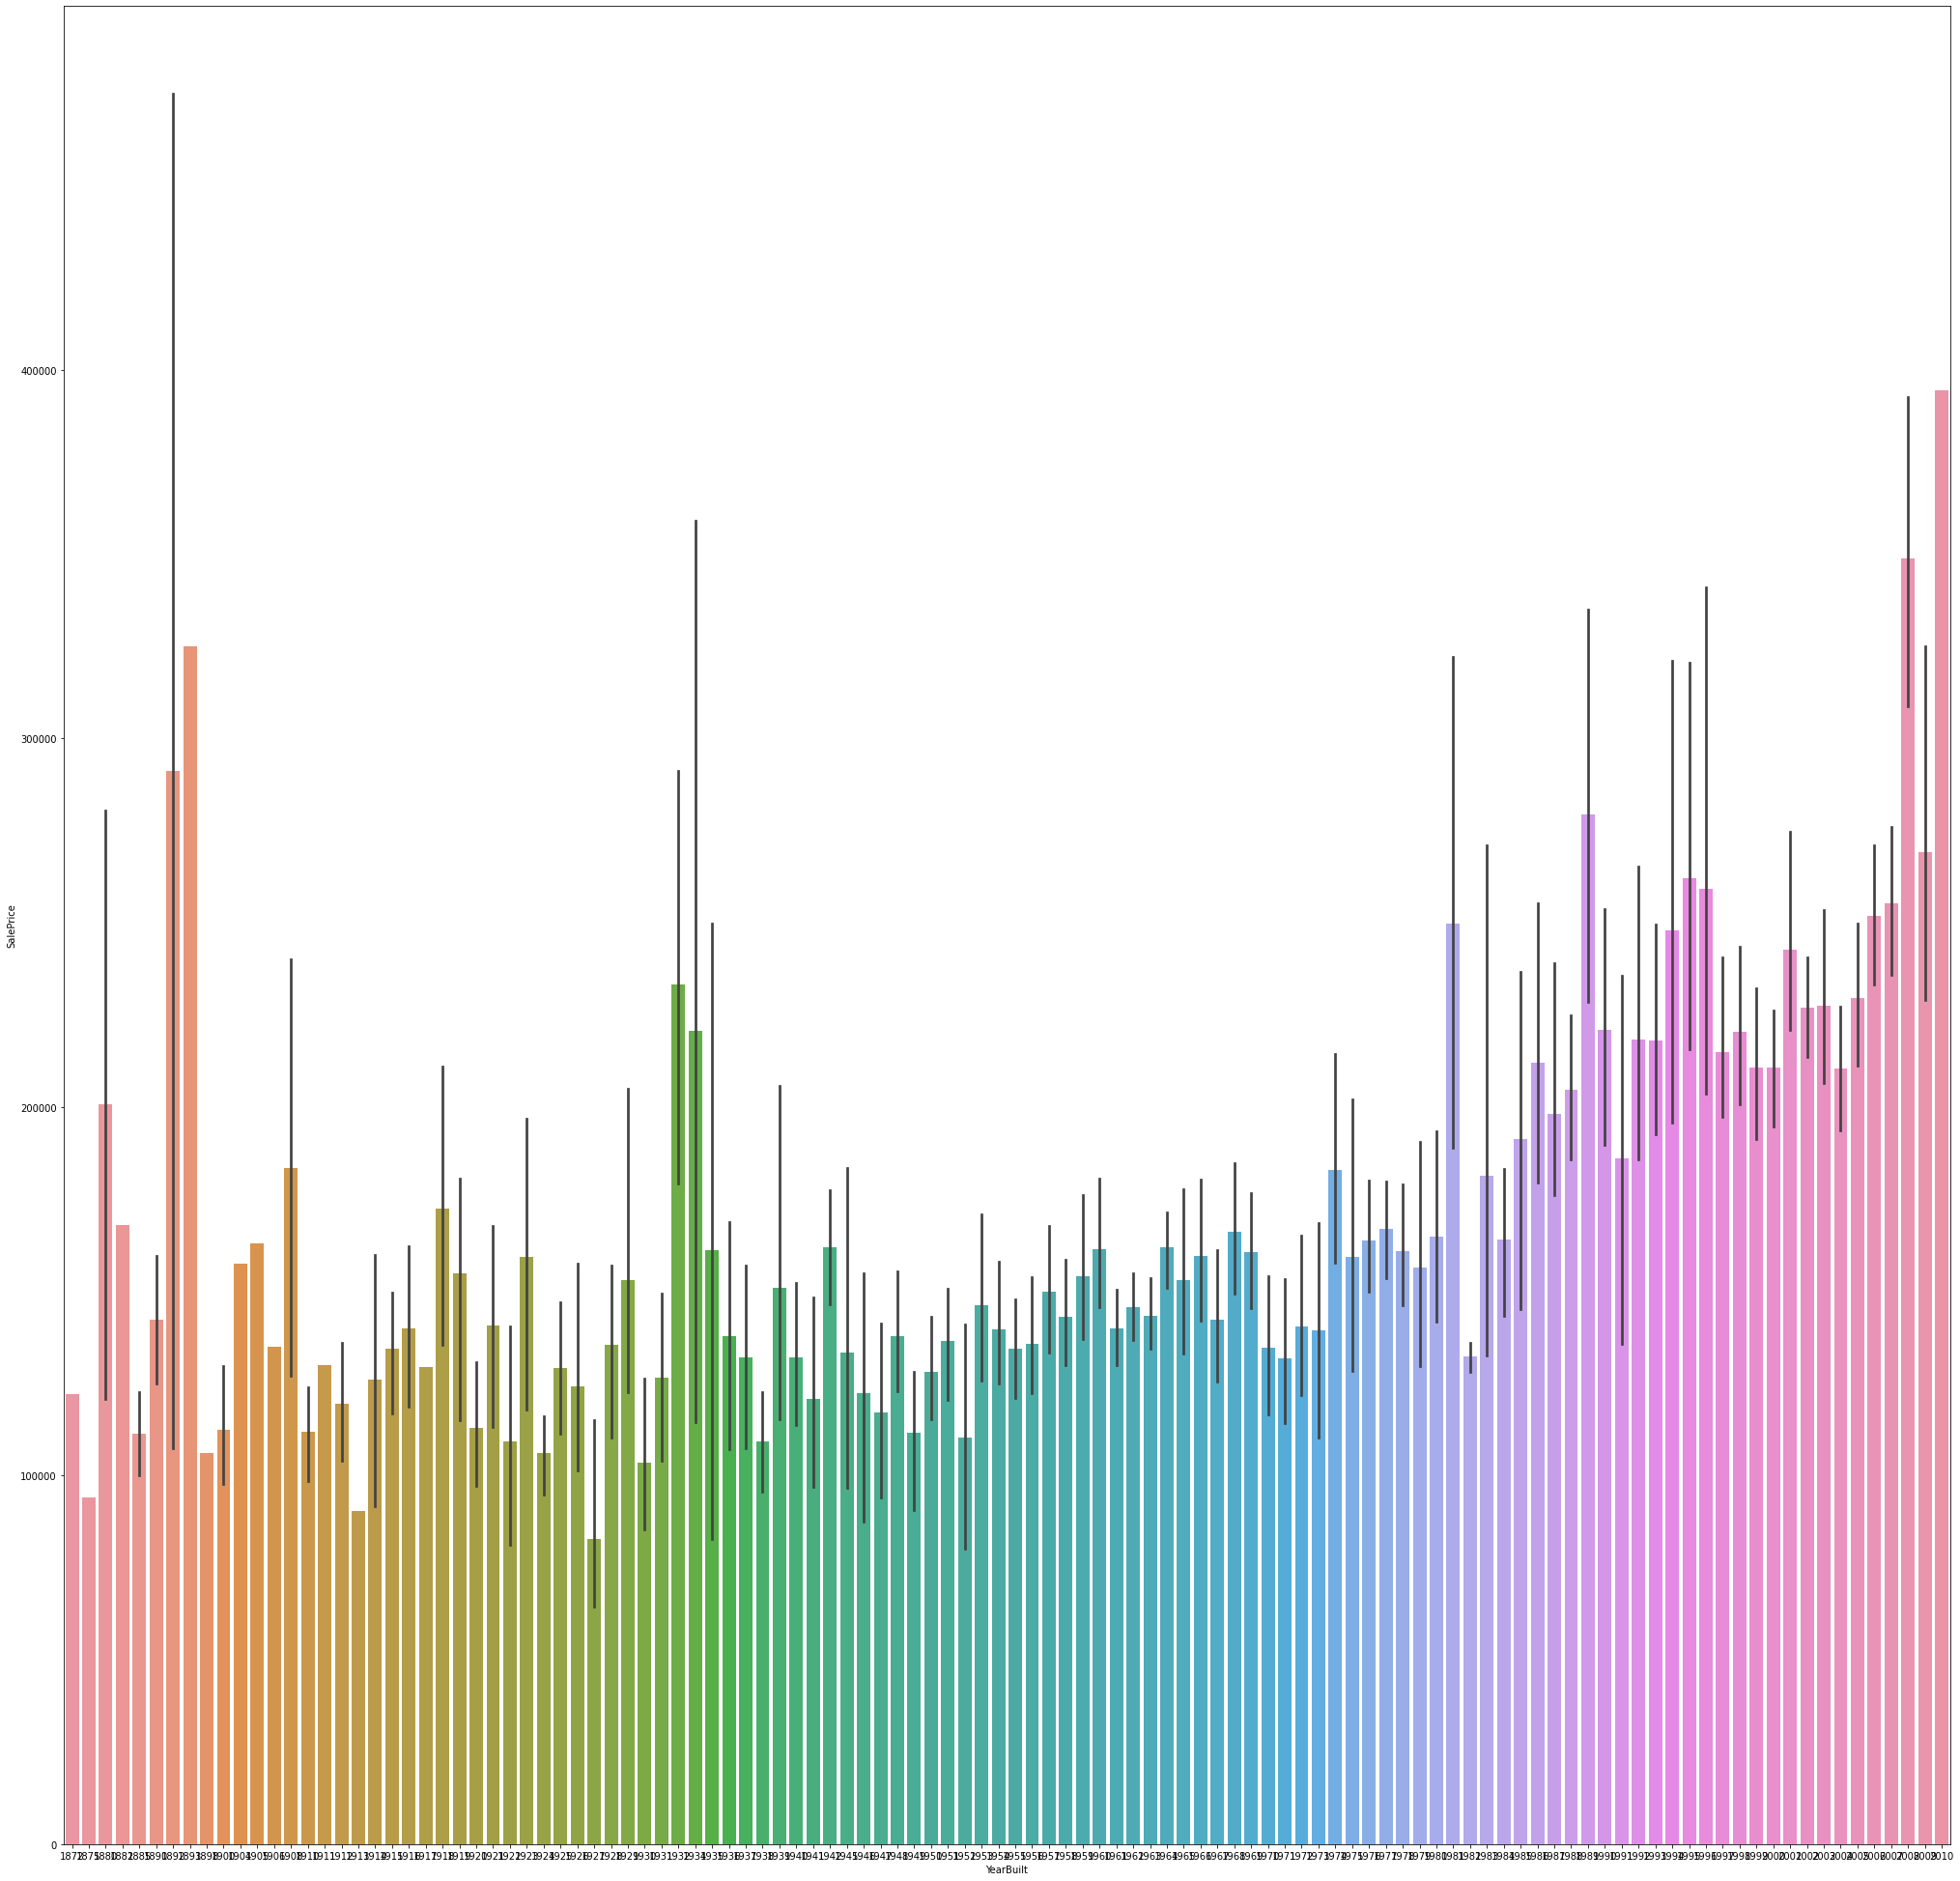

In [11]:
sns.barplot(x='YearBuilt', y='SalePrice', data=train_df)

# Dropping unnecessary columns

### "Train"

In [12]:
train_df=train_df.drop("Id",axis=1)
train_df=train_df.drop("Alley",axis=1)
train_df=train_df.drop("PoolQC",axis=1)
train_df=train_df.drop("Fence",axis=1)
train_df=train_df.drop("MiscFeature",axis=1)

### "Test"

In [13]:
test_df=test_df.drop("Alley",axis=1)
test_df=test_df.drop("PoolQC",axis=1)
test_df=test_df.drop("Fence",axis=1)
test_df=test_df.drop("MiscFeature",axis=1)

# Taking care of misssing data

### "Train" Numerical

In [14]:
train_df["LotFrontage"] = train_df["LotFrontage"].fillna(train_df["LotFrontage"].mean())
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].mean())
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(2001)

### "Train" Categorical 

In [15]:
c = ("GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical", "FireplaceQu", "BsmtFinType1")
for col in c:
  if train_df[col].dtype == "object":
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

''' OR
for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical", "FireplaceQu", "BsmtFinType1"):
  test_df[col] = test_df[col].fillna('None')
'''

' OR\nfor col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical", "FireplaceQu", "BsmtFinType1"):\n  test_df[col] = test_df[col].fillna(\'None\')\n'

### "Test" Numerical

In [16]:
test_df["LotFrontage"] = test_df["LotFrontage"].fillna(test_df["LotFrontage"].mean())
test_df["MasVnrArea"] = test_df["MasVnrArea"].fillna(test_df["MasVnrArea"].mean())
test_df["GarageYrBlt"] = test_df["GarageYrBlt"].fillna(2001)
test_df["GarageCars"] = test_df["GarageCars"].fillna(0)
test_df["GarageArea"] = test_df["GarageArea"].fillna(test_df["GarageArea"].mean())
test_df["BsmtFullBath"] = test_df["BsmtFullBath"].fillna(0)
test_df["BsmtHalfBath"] = test_df["BsmtHalfBath"].fillna(0)
test_df["BsmtFinSF1"] = test_df["BsmtFinSF1"].fillna(test_df["BsmtFinSF1"].mean())
test_df["BsmtFinSF2"] = test_df["BsmtFinSF2"].fillna(test_df["BsmtFinSF2"].mean())
test_df["TotalBsmtSF"] = test_df["TotalBsmtSF"].fillna(test_df["TotalBsmtSF"].mean())
test_df["BsmtUnfSF"] = test_df["BsmtUnfSF"].fillna(test_df["BsmtUnfSF"].mean())


### "Test" Categorical

In [17]:
c = ("GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical","MSZoning","Utilities","Exterior1st","Exterior2nd","KitchenQual","Functional","FireplaceQu","SaleType", "BsmtFinType1")
for col in c:
  if test_df[col].dtype == "object":
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

''' OR
for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical","MSZoning","Utilities","Exterior1st","Exterior2nd","KitchenQual","Functional","FireplaceQu","SaleType", "BsmtFinType1"):
  test_df[col] = test_df[col].fillna('None')
'''

' OR\nfor col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical","MSZoning","Utilities","Exterior1st","Exterior2nd","KitchenQual","Functional","FireplaceQu","SaleType", "BsmtFinType1"):\n  test_df[col] = test_df[col].fillna(\'None\')\n'

### Updated info()

In [18]:
# All the missing values are filled
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

### Plotting the categorical data

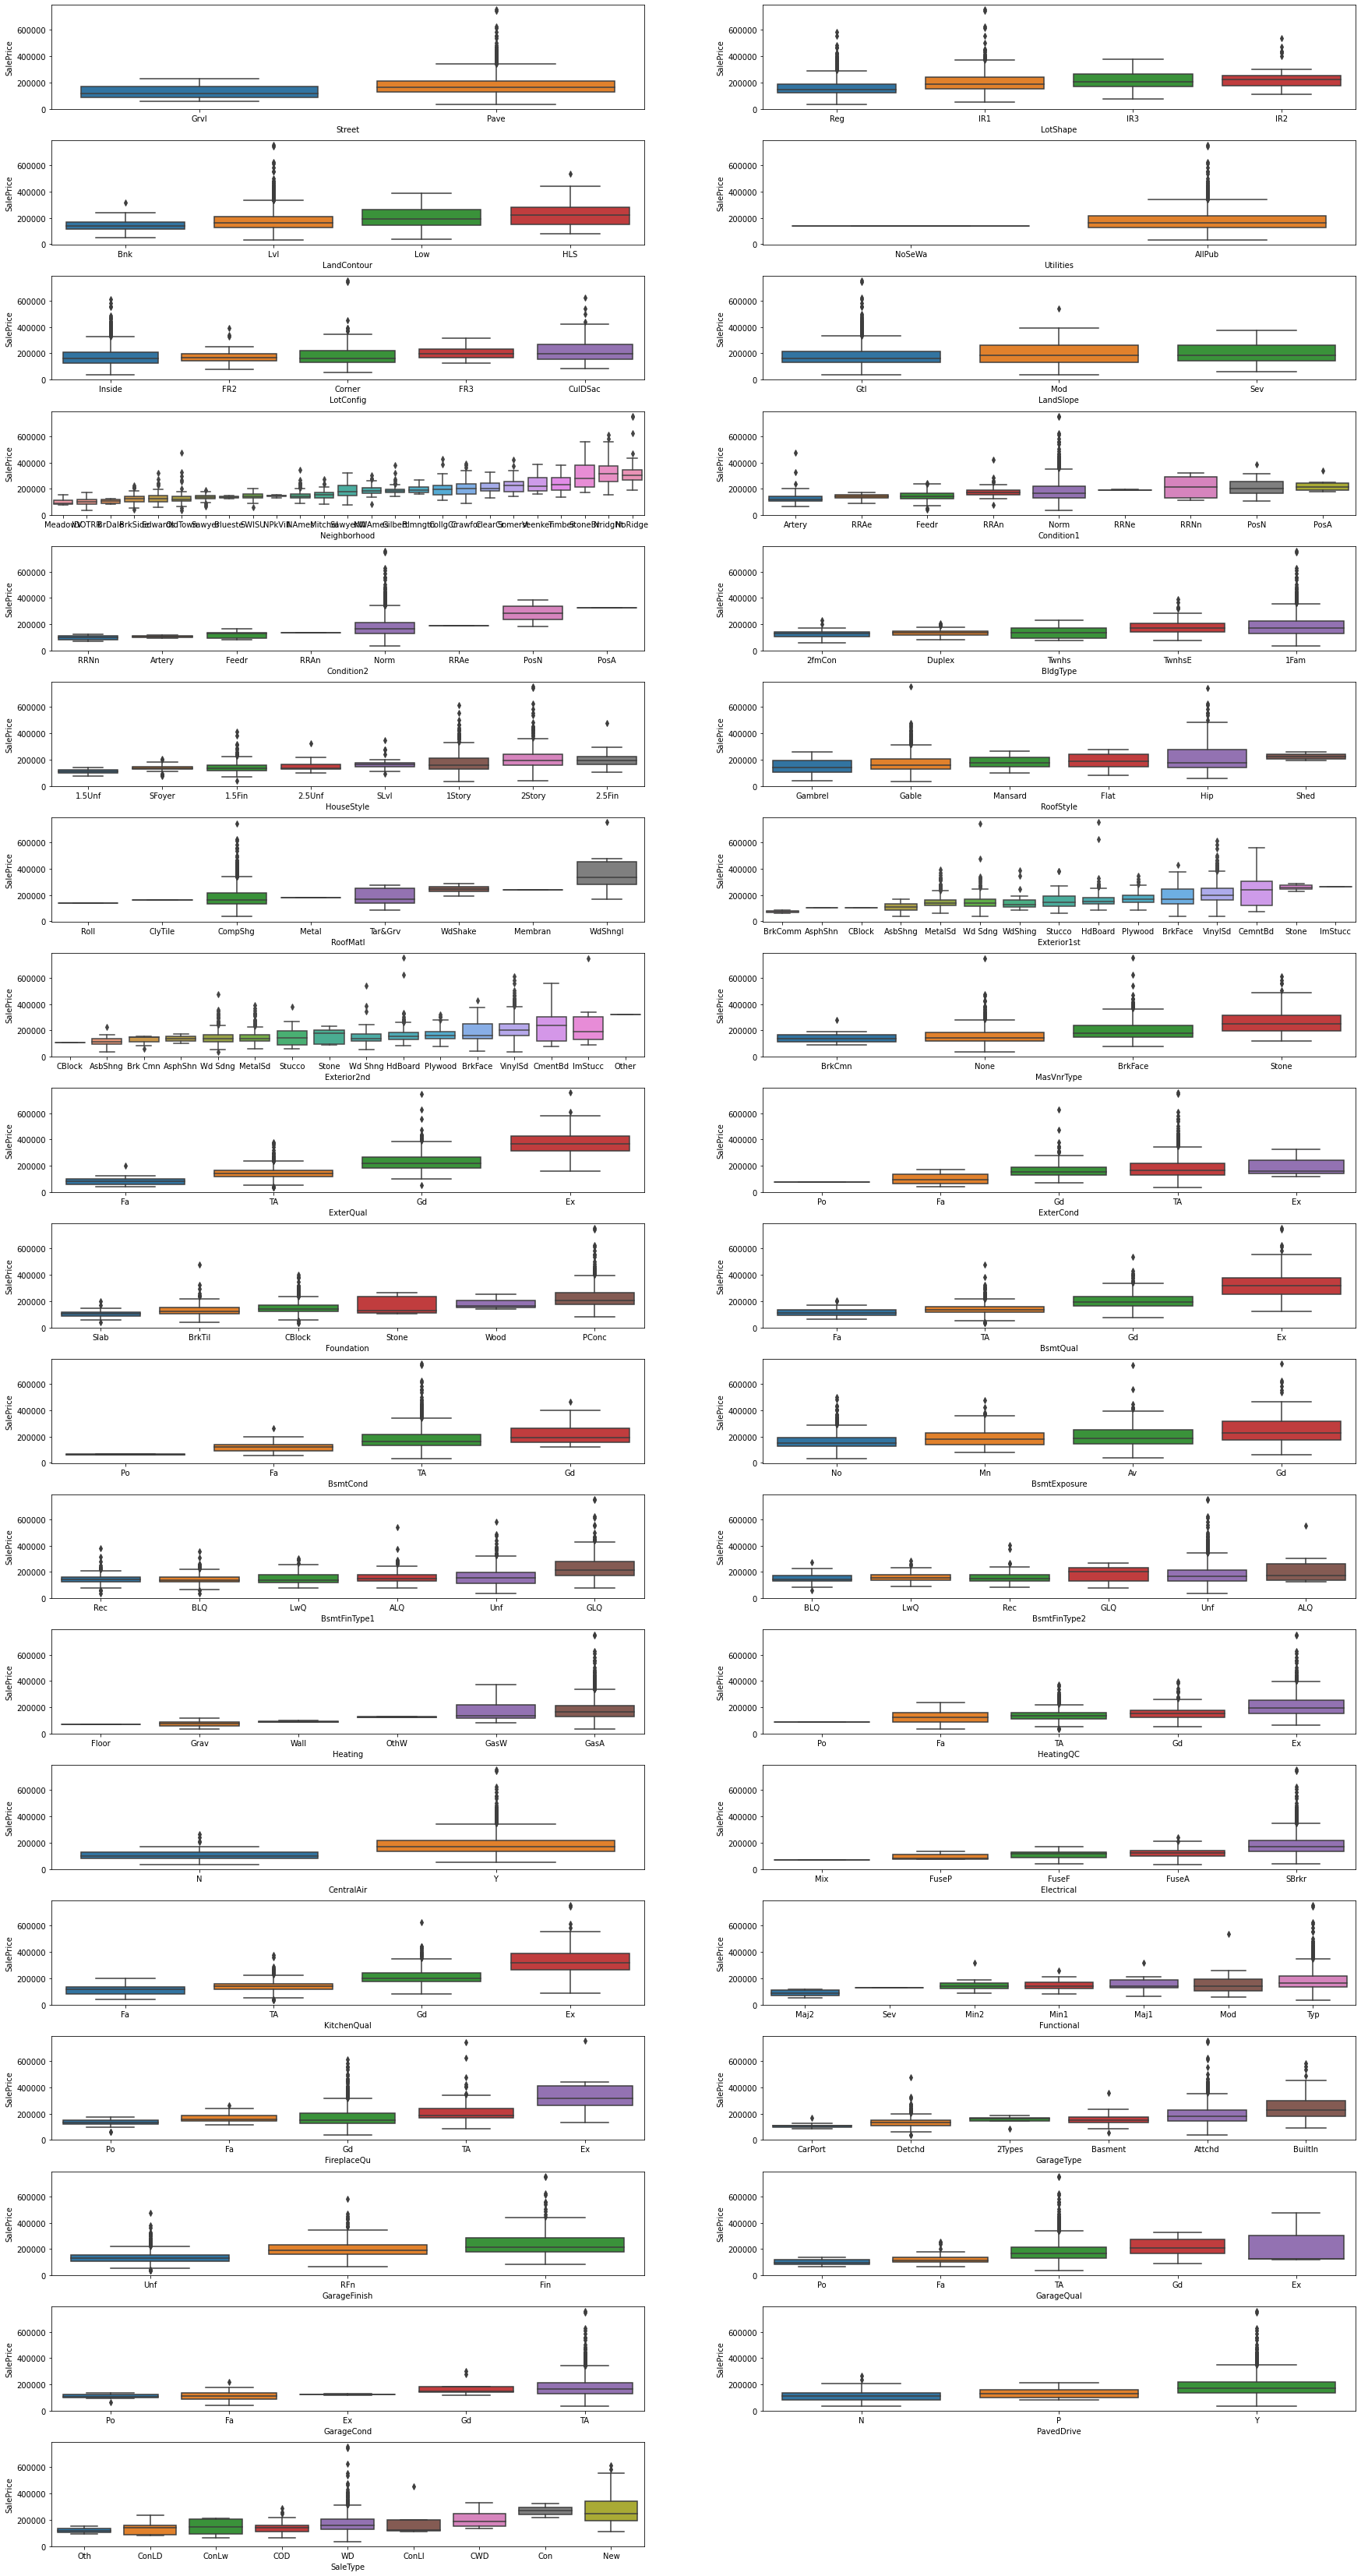

In [20]:
categorical_cols_df = train_df.select_dtypes(include='object')
cols = categorical_cols_df.columns
fig = plt.figure(figsize = (30,60))
fig.subplots_adjust(hspace=0.3)
len(cols)
for i in range(1,38):
    plt.subplot(19, 2, i)
    order = train_df.groupby(cols[i])['SalePrice'].mean().sort_values(ascending=True).index.values
    sns.boxplot(x=cols[i], y='SalePrice', data= train_df, order = order)

# Encoding categorical data

In [21]:
categorical_cols_df = train_df.select_dtypes(include='object')
cols = categorical_cols_df.columns
cols
for i in cols:
    order = train_df.groupby(i)['SalePrice'].mean().sort_values(ascending=True).index.values
    train_df[i].replace(to_replace=order, value=list(range(0,len(order))), inplace = True)
    test_df[i].replace(to_replace=order, value=list(range(0,len(order))), inplace = True)

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Updated head()

In [23]:
# All the categorical data is encoded with numbers
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,0,1,1,0,0,...,0,0,0,0,0,2,2008,4,4,208500
1,20,3,80.0,9600,1,0,1,1,1,0,...,0,0,0,0,0,5,2007,4,4,181500
2,60,3,68.0,11250,1,1,1,1,0,0,...,0,0,0,0,0,9,2008,4,4,223500
3,70,3,60.0,9550,1,1,1,1,2,0,...,272,0,0,0,0,2,2006,4,1,140000
4,60,3,84.0,14260,1,1,1,1,1,0,...,0,0,0,0,0,12,2008,4,4,250000


In [24]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,0,1,1,0,...,0,0,0,120,0,0,6,2010,4,4
1,1462,20,3,81.0,14267,1,1,1,1,2,...,36,0,0,0,0,12500,6,2010,4,4
2,1463,60,3,74.0,13830,1,1,1,1,0,...,34,0,0,0,0,0,3,2010,4,4
3,1464,60,3,78.0,9978,1,1,1,1,0,...,36,0,0,0,0,0,6,2010,4,4
4,1465,120,3,43.0,5005,1,1,3,1,0,...,82,0,0,144,0,0,1,2010,4,4


In [25]:
test_df.isnull().sum()[test_df.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Spliting the Train & Test datasets

In [27]:
X_train = train_df.drop("SalePrice", axis=1)
Y_train = train_df["SalePrice"]
X_test  = test_df.drop("Id", axis=1).copy()
''' OR
X_train = train_df[:, 0:-1]
Y_train = train_df[:, -1]
X_test  = test_df[:, 1:]
'''

' OR\nX_train = train_df[:, 0:-1]\nY_train = train_df[:, -1]\nX_test  = test_df[:, 1:]\n'

# Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
print(X_train)

[[ 0.07337496  0.35904396 -0.22937175 ...  0.13877749 -0.23900538
   0.18996938]
 [-0.87256276  0.35904396  0.4519361  ... -0.61443862 -0.23900538
   0.18996938]
 [ 0.07337496  0.35904396 -0.09311018 ...  0.13877749 -0.23900538
   0.18996938]
 ...
 [ 0.30985939  0.35904396 -0.18395123 ...  1.64520971 -0.23900538
   0.18996938]
 [-0.87256276  0.35904396 -0.09311018 ...  1.64520971 -0.23900538
   0.18996938]
 [-0.87256276  0.35904396  0.22483348 ...  0.13877749 -0.23900538
   0.18996938]]


In [30]:
print(Y_train)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


# Dimensionality Reduction

In [31]:
# Principle Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# <font color='blue'>Part 2 - Training the Regression model on the Training set</font>

In [32]:
from sklearn.ensemble import RandomForestRegressor
score_RF_list = []
for i in range(10,250,10):
    RF=RandomForestRegressor(n_estimators = i, random_state = 0)
    RF.fit(X_train,Y_train)
    score_RF = round(RF.score(X_train, Y_train) * 100, 2)
    score_RF_list.append(score_RF)
    
score_RF_list   

[97.61,
 98.07,
 98.05,
 98.16,
 98.25,
 98.21,
 98.23,
 98.14,
 98.15,
 98.19,
 98.22,
 98.22,
 98.25,
 98.25,
 98.24,
 98.25,
 98.26,
 98.25,
 98.23,
 98.25,
 98.23,
 98.23,
 98.22,
 98.24]

<AxesSubplot:>

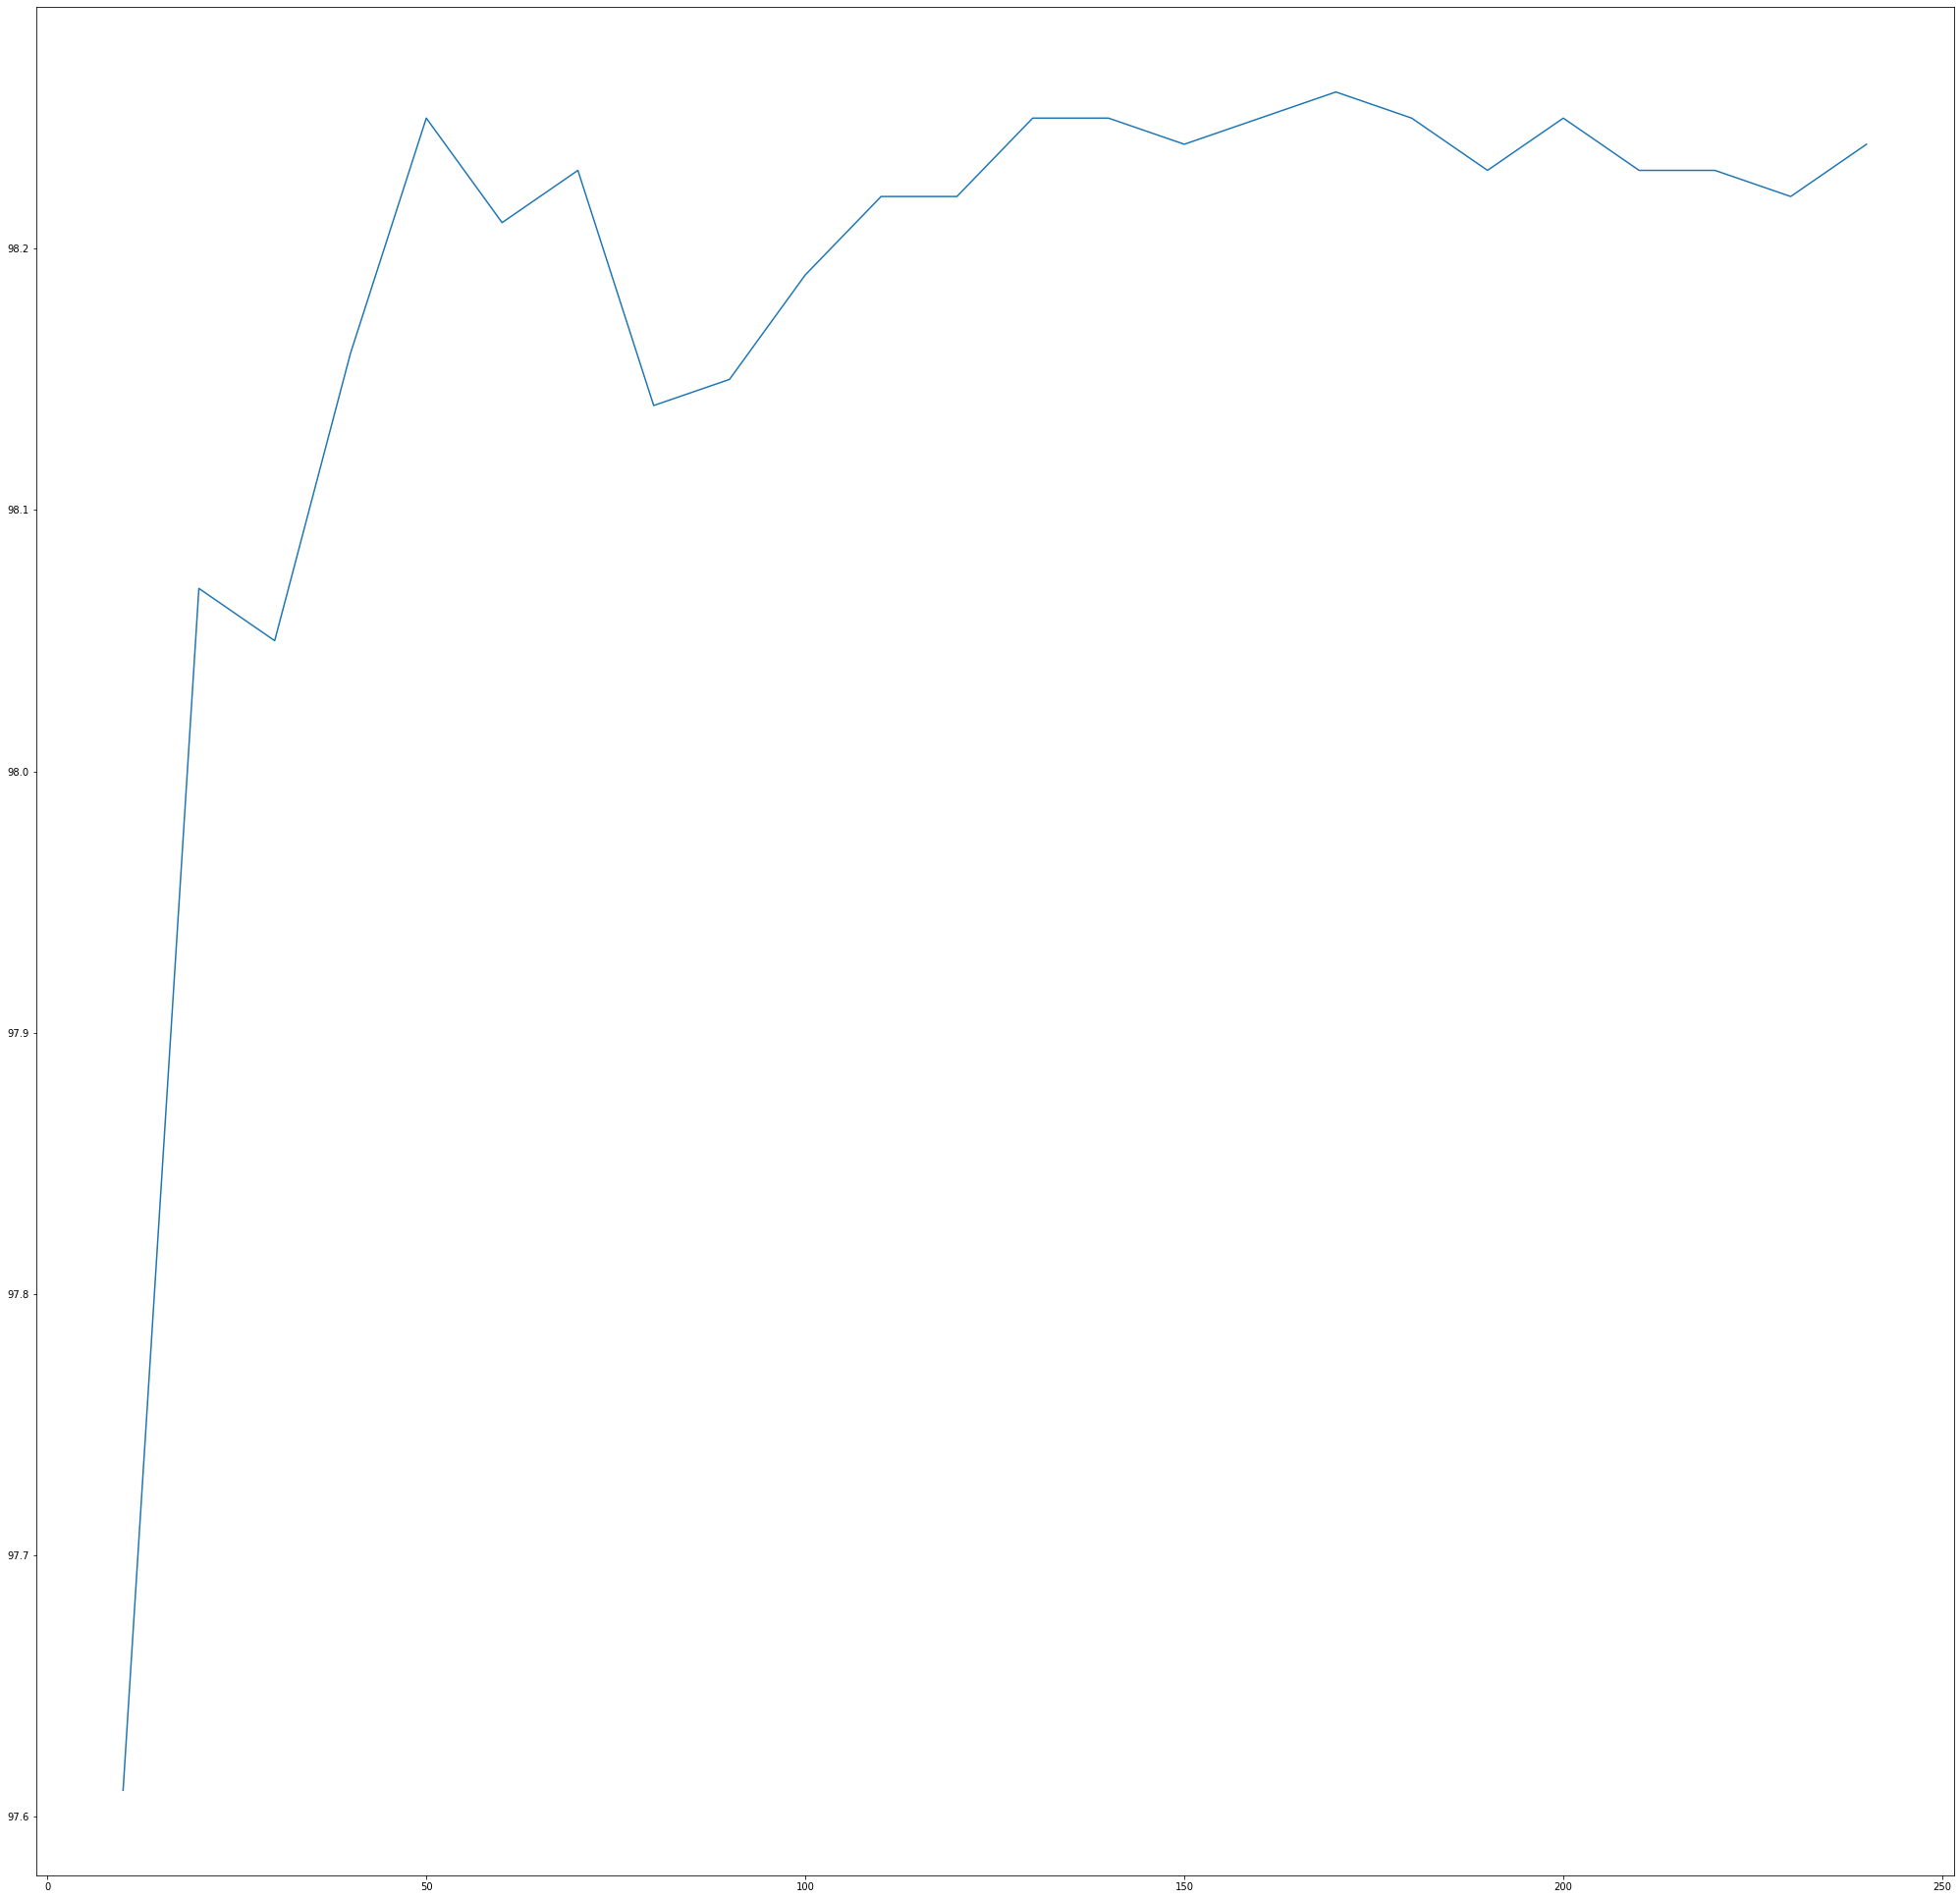

In [33]:
x_axis = [x for x in range(10,250,10)]
sns.lineplot(x=x_axis, y=score_RF_list)

In [34]:

regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

### Other Algorithms 

In [35]:
''' OR
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
'''

' OR\nfrom xgboost import XGBRegressor\nregressor = XGBRegressor()\nregressor.fit(X_train, Y_train)\nY_pred = regressor.predict(X_test)\n'

### Accuracy score

In [36]:
from sklearn.metrics import accuracy_score
regressor.score(X_train, Y_train)
regressor = round(regressor.score(X_train, Y_train) * 100, 2)
regressor

98.25

# <font color='blue'>Part 3 - Creating a submission.csv</font>

In [37]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })

In [38]:
submission.to_csv('submission.csv', index=False)
submission

,Id,SalePrice
0,1461,124856.00
1,1462,155444.00
2,1463,185762.00
3,1464,192036.00
4,1465,178951.50
...,...,...
1454,2915,91419.00
1455,2916,105886.66
1456,2917,169926.00
1457,2918,118153.00
